In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 图片相加
img = cv2.imread('image.jpg')
img_o = cv2.imread('opencv-logo-white.png')

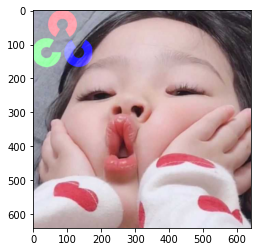

In [3]:
img_a = np.copy(img)
for i in range(img_o.shape[0]):
    for j in range(img_o.shape[1]):
        img_a[i,j] = cv2.add(img[i, j], img_o[i, j]).ravel()
plt.imshow(img_a[:,:,::-1])
plt.show()

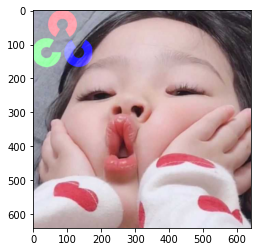

In [4]:
img1 = img[:img_o.shape[0],:img_o.shape[1]]
img1 = cv2.add(img1, img_o)
img2 = np.copy(img)
img2[:img_o.shape[0],:img_o.shape[1]] = img1
plt.imshow(img2[:,:,::-1])
plt.show()

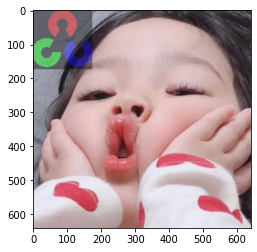

In [5]:
img_a = np.copy(img)
for i in range(img_o.shape[0]):
    for j in range(img_o.shape[1]):
        img_a[i,j] = cv2.addWeighted(img[i, j], 0.6, img_o[i, j], 0.4, 0).ravel()
plt.imshow(img_a[:,:,::-1])
plt.show()

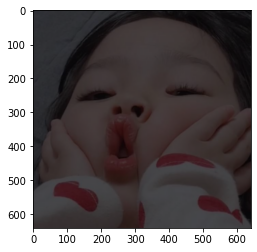

In [6]:
plt.imshow((np.array(img * 0.3, np.uint8))[:,:,::-1])
plt.show()

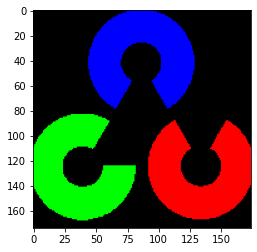

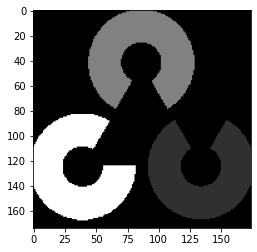

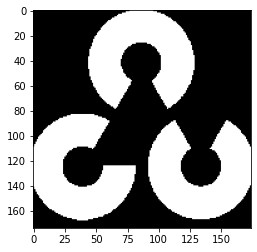

In [7]:
rows, cols = img_o.shape[:2]
roi = img[:rows, :cols]

# 创建掩膜
# 图像变成灰度图
img2gray = cv2.cvtColor(img_o, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
plt.imshow(img_o)
plt.show()
plt.imshow(img2gray, 'gray')
plt.show()
plt.imshow(mask, 'gray')
plt.show()

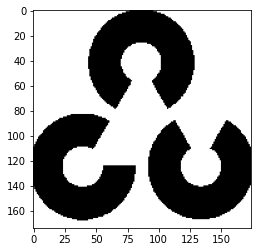

In [8]:
# 由于上图就是二值化图像
# 所以下面的操作就是切换颜色
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv, 'gray')
plt.show()

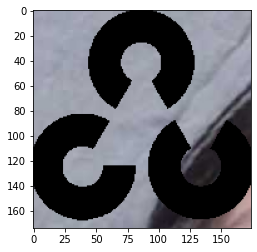

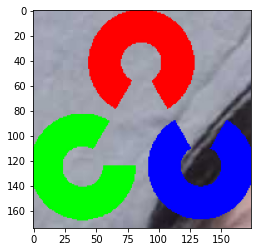

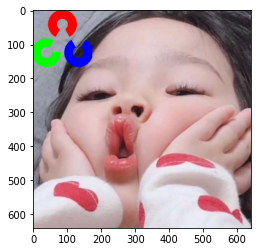

In [9]:
img1_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
plt.imshow(img1_bg[:,:,::-1])
plt.show()
dst = cv2.add(img1_bg, img_o)
plt.imshow(dst[:,:,::-1])
plt.show()
img[:rows, :cols] = dst
plt.imshow(img[:,:,::-1])
plt.show()